In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [ ]:
directory_path = "IdVd"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
file_first = file_list[0]
df = mo.read_csv_direction(file_first)
df

KeyError: ' ID'

In [4]:
df_reshaped = mo.reshape_table_by_VG(df)
df_reshaped.columns

MultiIndex([(' ID', -2.0),
            (' ID', -1.5),
            (' ID', -1.0),
            (' ID', -0.5),
            (' ID',  0.0),
            (' ID',  0.5),
            (' ID',  1.0)],
           names=[None, ' VG'])

In [6]:
df_sorted = mo.reorder_by_VD(df_reshaped)
df_new = df_sorted.reset_index().set_index(' VD')
df_new

,forward,V_G = -2.0,V_G = -1.5,V_G = -1.0,V_G = -0.5,V_G = 0.0,V_G = 0.5,V_G = 1.0
VD,,,,,,,,
0.000,False,0.000045,0.000104,0.000265,0.000534,0.000270,-0.000501,-0.000970
0.015,False,0.000198,0.000493,0.001278,0.003533,0.006957,0.009563,0.010736
0.030,False,0.000333,0.000838,0.002213,0.006364,0.013221,0.019262,0.021984
0.045,False,0.000462,0.001160,0.003079,0.008845,0.018923,0.028365,0.032649
0.060,False,0.000583,0.001479,0.003829,0.011137,0.024367,0.036979,0.042608
...,...,...,...,...,...,...,...,...
0.060,True,0.000628,0.001485,0.004099,0.011038,0.024399,0.036026,0.041904
0.045,True,0.000506,0.001185,0.003287,0.008832,0.018983,0.027524,0.032175
0.030,True,0.000371,0.000873,0.002420,0.006370,0.013209,0.018862,0.021682


In [9]:
df_new.drop(columns=' forward',inplace=True)
df_new.columns

Index(['V_G = -2.0', 'V_G = -1.5', 'V_G = -1.0', 'V_G = -0.5', 'V_G = 0.0',
       'V_G = 0.5', 'V_G = 1.0'],
      dtype='object')

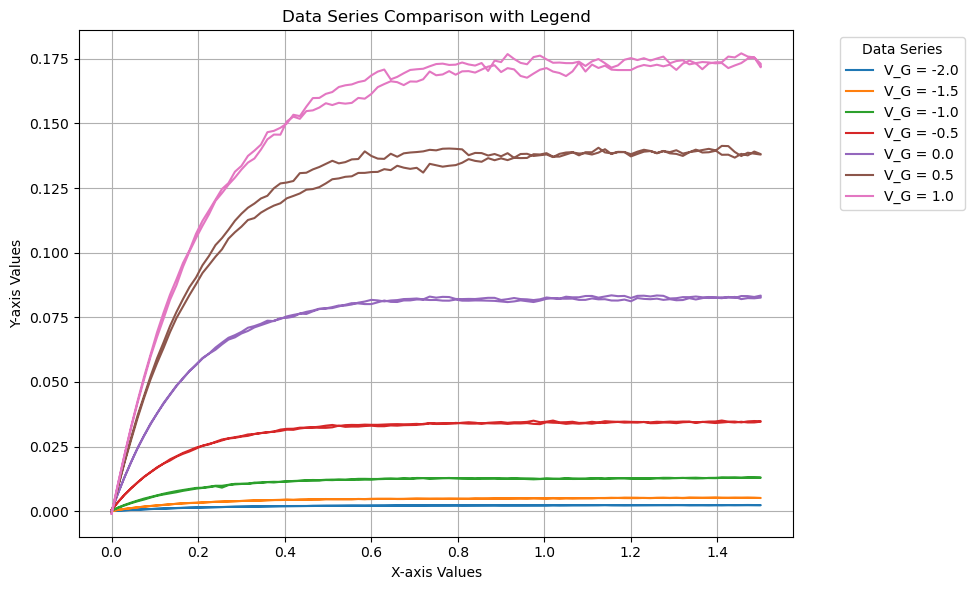

In [12]:
ax = df_new.plot(y=['V_G = -2.0', 'V_G = -1.5', 'V_G = -1.0', 'V_G = -0.5', 'V_G = 0.0',
       'V_G = 0.5', 'V_G = 1.0'], kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [3]:
for file in file_list:
    print(f'{file} started')
    
    df = mo.read_csv_direction(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VD(df_reshaped)
    df_new = df_sorted.reset_index().set_index(' VD')
    df_new.drop(columns=' forward',inplace=True)
    filename =directory_path + '\\sorted\\' + file[5:]
    df_new.to_csv(filename, index=True)
    

IdVd\E41-A4_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E41-D14_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E41-D17_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E41-G14_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E41-I18_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E41-O15_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E43-H17_ExfoliatedMoS2_TGIdVd_.csv started
IdVd\E44-T1_ExfoliatedMoS2_TGIdVd_.csv started
